## Project 1: Identifying side Effects and Evaluating the effectiveness of Drugs

# Team name: Learners

    Faiqa Rahi    : 6+ year exp. in Business Analyst
    Dimple Rawat  : 8+ year exp. in HR
    Neeraj Shukla : 10+ year in programing in IT
    Rahul         : 3+ year of exp. in Electrical Domain
    Pushpadant    : 1.5  year exp. in Medical Equipment Service Engineering
    Mrityunjay    : 2 months Trainee in Preventive Maintenance

# Business objective : 

The aim of this project is to create a text-mining model to evaluate the effectiveness and detect potential side effects from online customer reviews on specific prescriptive drugs. 

# Dataset : 

The Drug Review Dataset is taken from the Kaggle website.This Dataset provides patient reviews on specific drugs along with related conditions and patient rating reflecting the overall patient satisfaction. This dataset contains different types of features which are categorical, numerical, text and date.






In [1]:
import numpy as np # NumPy arrays used to advanced mathematical and other types of operations on large numbers of data. 
import pandas as pd # Pandas is the most popular python library that is used for data analysis
import matplotlib.pyplot as plt #pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation.
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib
from wordcloud import WordCloud # Wordcloud (or Tag cloud) is a visual representation of text data.
from wordcloud import STOPWORDS #Stopwords are the English words which does not add much meaning to a sentence.
import nltk # NLTK used for such as tokenizing, part-of-speech tagging, stemming, sentiment analysis, topic segmentation, and named entity recognition. 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Dataset using pandas lib.
train_data = pd.read_csv("drugsComTrain_raw.csv")
test_data = pd.read_csv("drugsComTest_raw.csv")

In [3]:
test_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [4]:
train_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


# EDA

In [5]:
print("Shape of Train Data", train_data.shape)
print("Shape of Test Data", test_data.shape)

Shape of Train Data (161297, 7)
Shape of Test Data (53766, 7)


In [6]:
#Droping Null values
train_data = train_data.dropna(how = 'any', axis = 0)
test_data = test_data.dropna(how = 'any', axis = 0)

In [7]:
print("Shape of Train Data", train_data.shape)
print("Shape of Test Data", test_data.shape)

Shape of Train Data (160398, 7)
Shape of Test Data (53471, 7)


In [8]:
#Merging both dataset into one
merge_dataset = [train_data, test_data]
df_final_data = pd.concat(merge_dataset)
df_final_data.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [9]:
#Rename the coulmn name with appropriate name.
df_final_data =df_final_data.rename({'uniqueID':'uniqueid','drugName':'drugname','usefulCount':'usefulcount'},axis = 1)

In [10]:
df_final_data

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [11]:
# describing the data
df_final_data.describe()

,uniqueid,rating,usefulcount
count,213869.000000,213869.000000,213869.000000
mean,116076.924786,6.991149,28.094118
std,67016.705794,3.275792,36.401377
min,0.000000,1.000000,0.000000
25%,58122.000000,5.000000,6.000000
50%,115972.000000,8.000000,16.000000
75%,174018.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [12]:
#Getting the info about the features
df_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213869 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueid     213869 non-null  int64 
 1   drugname     213869 non-null  object
 2   condition    213869 non-null  object
 3   review       213869 non-null  object
 4   rating       213869 non-null  int64 
 5   date         213869 non-null  object
 6   usefulcount  213869 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [13]:
# checking if the data contains any NULL values
df_final_data.isnull().any()

uniqueid       False
drugname       False
condition      False
review         False
rating         False
date           False
usefulcount    False
dtype: bool

In [14]:
df_final_data[df_final_data.condition.str.contains("users found this comment helpful")]

,uniqueid,drugname,condition,review,rating,date,usefulcount
105,220696,Loestrin 24 Fe,2</span> users found this comment helpful.,"""I&#039;m 16 and I have been on Loestrin 24 f...",3,3-Nov-10,2
196,67383,Provera,4</span> users found this comment helpful.,"""I&#039;m 24 years old and have always had a p...",1,27-Mar-16,4
243,81588,Yaz,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a...",3,1-Jun-10,3
264,132965,Loestrin 24 Fe,4</span> users found this comment helpful.,"""Took this pill for 1.) Acne and 2.) Birth Con...",2,24-Jun-14,4
391,91050,Norco,11</span> users found this comment helpful.,"""I have suffered with low back pain - 2 surger...",9,15-Mar-09,11
...,...,...,...,...,...,...,...
52443,133354,Tri-Sprintec,3</span> users found this comment helpful.,"""I have been taking this pill for less than a ...",8,24-Sep-10,3
53116,149494,Mirena,5</span> users found this comment helpful.,"""I got the Mirena put in last month. And holy ...",7,12-Feb-13,5
53287,91988,Lyrica,21</span> users found this comment helpful.,"""It was a nightmare.I had the worse side effec...",1,14-Apr-15,21
53353,174757,Dulera,28</span> users found this comment helpful.,"""My 10 year old son took Dulera for asthma. I...",1,29-Feb-12,28


In [15]:
df_final_data.loc[(df_final_data['condition']==' ')|
                  (df_final_data.condition.str.contains("users found this comment helpful")),'condition']='Other'
df_final_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [16]:
df_final_data['condition'].nunique()

837

In [17]:
df_final_data['drugname'].nunique()

3667

In [18]:
#Get the count of Drug name with their rating
df_final_data.loc[df_final_data['rating'] == 1, :]['drugname'].value_counts().head(10)

Miconazole                            767
Ethinyl estradiol / norethindrone     728
Etonogestrel                          707
Levonorgestrel                        511
Nexplanon                             504
Ethinyl estradiol / norgestimate      464
Medroxyprogesterone                   443
Depo-Provera                          417
Tioconazole                           410
Ethinyl estradiol / levonorgestrel    385
Name: drugname, dtype: int64

In [19]:
#Sorted Drug Name with Asc order.
df_final_data=df_final_data.sort_values(by=['drugname']).reset_index(drop=True)
df_final_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,163935,A + D Cracked Skin Relief,Bacterial Skin Infection,"""I have severe cracked skin on my hands. I&#0...",10,7-Dec-09,6
1,131174,A / B Otic,Otitis Media,"""These drops helped me so much. I was in sever...",10,27-Mar-09,18
2,131173,A / B Otic,Otitis Media,"""It numbs the pain. It makes my ear feel heavi...",10,23-Sep-09,20
3,70711,Abacavir / dolutegravir / lamivudine,HIV Infection,"""ok...its been 30 days and all is well....yes,...",9,31-Aug-16,15
4,70730,Abacavir / dolutegravir / lamivudine,HIV Infection,"""I recently found out about my positive status...",7,3-Jan-15,26


In [20]:
# If needed then we can sort it on unique id 
#df_final_data.sort_values(['uniqueid'], ascending = True, inplace = True)
#df_final_data.reset_index(drop = True, inplace = True)

In [21]:
df_final_data['drugname'].nunique( dropna = True) 
df_final_data

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,163935,A + D Cracked Skin Relief,Bacterial Skin Infection,"""I have severe cracked skin on my hands. I&#0...",10,7-Dec-09,6
1,131174,A / B Otic,Otitis Media,"""These drops helped me so much. I was in sever...",10,27-Mar-09,18
2,131173,A / B Otic,Otitis Media,"""It numbs the pain. It makes my ear feel heavi...",10,23-Sep-09,20
3,70711,Abacavir / dolutegravir / lamivudine,HIV Infection,"""ok...its been 30 days and all is well....yes,...",9,31-Aug-16,15
4,70730,Abacavir / dolutegravir / lamivudine,HIV Infection,"""I recently found out about my positive status...",7,3-Jan-15,26
...,...,...,...,...,...,...,...
213864,53296,femhrt,Postmenopausal Symptoms,"""This medication completely changed my life fo...",10,11-Jan-11,42
213865,53297,femhrt,Other,"""I was on femHRT for four months and had BV (b...",1,29-Nov-10,0
213866,53295,femhrt,Acne,"""femhrt took away my hot flashes within a week...",8,28-Oct-14,2
213867,53298,femhrt,Postmenopausal Symptoms,"""Femhrt worked wonderful. Had to wait a coupl...",9,22-Nov-10,28


# Duplicated

In [22]:
df_final_data[df_final_data.duplicated(subset=['condition','review','rating','date','usefulcount'],keep=False)].sort_values(by=['review'])
# what this means is that on the same day, the reviewer wrote same review with gave same rating and mentioned same conditon 
# and on that review he got same useful count, this is almost impossible unless review from one medicine is copied to other
# medicine. There are 84710 repititon of this kind 

,uniqueid,drugname,condition,review,rating,date,usefulcount
6527,20474,Afrin,Nasal Congestion,"""\r\nAfrin is great and it works in seconds. ...",10,21-Jun-17,1
152989,106209,Oxymetazoline,Nasal Congestion,"""\r\nAfrin is great and it works in seconds. ...",10,21-Jun-17,1
195109,124699,Tri-Previfem,Birth Control,"""\r\nFirst of all, the worst side effect for m...",1,12-Sep-17,2
74715,83898,Ethinyl estradiol / norgestimate,Birth Control,"""\r\nFirst of all, the worst side effect for m...",1,12-Sep-17,2
114456,191485,Lisdexamfetamine,ADHD,"""\r\nGood. Concentration, happy, easy to talk ...",5,17-Oct-15,10
...,...,...,...,...,...,...,...
41210,42422,Concerta,ADHD,"""І am a 28 year old female with ADD and mild f...",9,15-Nov-17,6
97431,136917,Isotretinoin,Acne,"""​Hello everyone,\r\n\r\nI&#039;m your typical...",10,17-Jan-17,34
1335,157540,Accutane,Acne,"""​Hello everyone,\r\n\r\nI&#039;m your typical...",10,17-Jan-17,34
186132,228830,Tadalafil,Erectile Dysfunction,"""❤️❤️❤️ Cialis for US!! I wish I had my hus...",10,7-Aug-17,12


In [23]:
df_final_data=df_final_data.drop_duplicates(subset=['condition','review','rating','date','usefulcount'])

In [24]:
df_final_data

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,163935,A + D Cracked Skin Relief,Bacterial Skin Infection,"""I have severe cracked skin on my hands. I&#0...",10,7-Dec-09,6
1,131174,A / B Otic,Otitis Media,"""These drops helped me so much. I was in sever...",10,27-Mar-09,18
2,131173,A / B Otic,Otitis Media,"""It numbs the pain. It makes my ear feel heavi...",10,23-Sep-09,20
3,70711,Abacavir / dolutegravir / lamivudine,HIV Infection,"""ok...its been 30 days and all is well....yes,...",9,31-Aug-16,15
4,70730,Abacavir / dolutegravir / lamivudine,HIV Infection,"""I recently found out about my positive status...",7,3-Jan-15,26
...,...,...,...,...,...,...,...
213665,59384,Zyrtec,Other,"""Very effective in stopping runny nose and sni...",10,12-Oct-11,9
213674,59418,Zyrtec,Other,"""It was one of my worst days ever with Hay Fev...",10,23-Dec-08,20
213702,59322,Zyrtec,Other,"""I take allergy shots for air and mould. The ...",10,31-Dec-15,7
213747,34475,Zyrtec-D,Other,"""had tried claritin-d, and others prior to fin...",8,1-Dec-08,4


# Combining drugs with almost same name
Example:   Zantac,   Zantac 150

In [25]:
a=list(df_final_data.drugname.unique())

In [26]:
c=pd.DataFrame(a,columns=['Medicine Name']).astype(str)
k=c[c['Medicine Name'].str.contains('/')==False]
#k=c
t=[]
for n in k['Medicine Name']:
    n=n+' '
    l=list(k.loc[k['Medicine Name'].str.contains(n),'Medicine Name'])
    c=list(k.loc[k['Medicine Name'].str.contains(n)].index)
    k=k.drop(index=c)
    n=n[:-1]
    l.insert(0,n)
    o=len(l)
    if (o>=2):
        t.append(l)
        
# create a list of elements form the drugname which are similar and identical 
#in name and function but due to slight variation in name it is identified as new drug

# exmample
#['Afrin','Afrin 4 Hour Extra Moisturizing','Afrin NoDrip Sinus','Afrin Original]
#['Calan', 'Calan SR']

In [27]:
t

[['Abilify', 'Abilify Discmelt', 'Abilify Maintena'],
 ['Actonel', 'Actonel with Calcium'],
 ['Adderall', 'Adderall XR'],
 ['Advil',
  'Advil Cold and Sinus',
  'Advil Cold and Sinus Liqui-Gels',
  'Advil Liqui-Gels',
  'Advil Migraine',
  'Advil PM'],
 ['Afrin',
  'Afrin 4 Hour Extra Moisturizing',
  'Afrin NoDrip Sinus',
  'Afrin Original',
  'Afrin Sinus'],
 ['Alavert', 'Alavert D-12 Hour Allergy and Sinus'],
 ['Allegra', 'Allegra Allergy', 'Allegra ODT'],
 ['Ambien', 'Ambien CR'],
 ['Amethia', 'Amethia Lo'],
 ['Aricept', 'Aricept ODT'],
 ['Aristocort', 'Aristocort A'],
 ['Asacol', 'Asacol HD'],
 ['Atrovent', 'Atrovent HFA', 'Atrovent Nasal'],
 ['Avar', 'Avar LS Cleanser'],
 ['Avonex', 'Avonex Pen'],
 ['Axid', 'Axid AR'],
 ['Bactrim', 'Bactrim DS'],
 ['Belviq', 'Belviq XR'],
 ['Benadryl', 'Benadryl Allergy', 'Benadryl Allergy Sinus'],
 ['Benicar', 'Benicar HCT'],
 ['BenzEFoam', 'BenzEFoam Ultra'],
 ['Betapace', 'Betapace AF'],
 ['Biaxin', 'Biaxin XL'],
 ['Botox', 'Botox Cosmetic'],


In [28]:
for i in t:
    df_final_data.loc[df_final_data['drugname'].isin(i),'drugname']=i[0]
    
# replacing the name of the drugs with slight varition to indentical name in the present in the list 
# example replacing 'Zyrtec-D 12 Hour' with Zyrtec-D
# example replacing 'Tylenol 8 Hour','Tylenol Allergy Multi-Symptom Nighttime','Tylenol Arthritis Pain' with Tylenol

In [29]:
df_final_data.drugname.unique().shape
# Earlier ir 3667 and now it is reduced due to merging of similar drug name.

(2348,)

In [30]:
# Store final dataset into df_enc_data frame for encoding
df_enc_data = df_final_data

In [31]:
# Drop Unwanted columns for encoding
df_enc_data.drop(['uniqueid', 'date', 'usefulcount'], axis = 1, inplace = True) 

In [32]:
df_enc_data.head()

,drugname,condition,review,rating
0,A + D Cracked Skin Relief,Bacterial Skin Infection,"""I have severe cracked skin on my hands. I&#0...",10
1,A / B Otic,Otitis Media,"""These drops helped me so much. I was in sever...",10
2,A / B Otic,Otitis Media,"""It numbs the pain. It makes my ear feel heavi...",10
3,Abacavir / dolutegravir / lamivudine,HIV Infection,"""ok...its been 30 days and all is well....yes,...",9
4,Abacavir / dolutegravir / lamivudine,HIV Infection,"""I recently found out about my positive status...",7


In [33]:
#Encoding the text column values in train and test data set to numeric value 
from sklearn.preprocessing import LabelEncoder
ll=LabelEncoder()

In [34]:
#Encoding 
EC= df_enc_data.apply(ll.fit_transform)
EC.head()

,drugname,condition,review,rating
0,0,83,49369,9
1,1,528,110957,9
2,1,528,89548,9
3,2,287,127843,8
4,2,287,55899,6


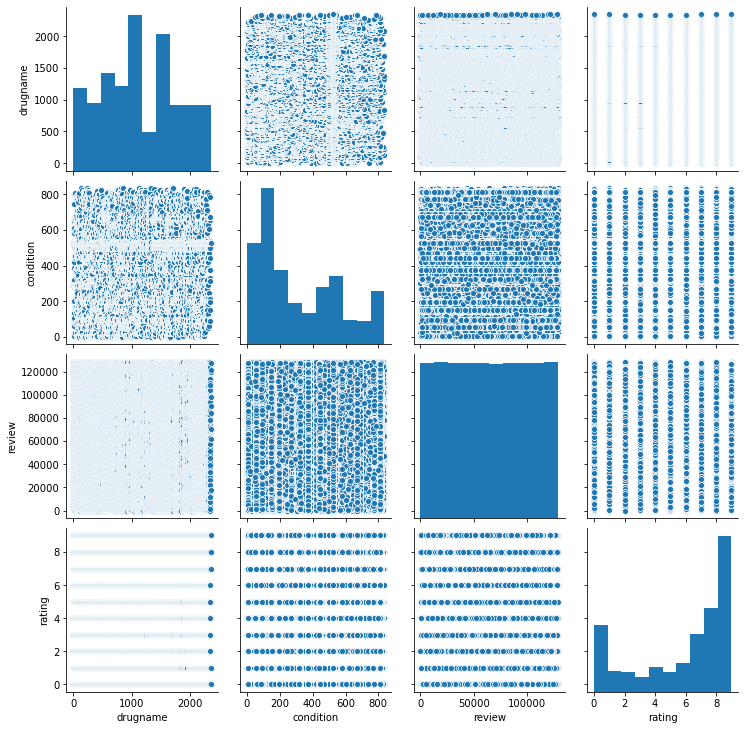

In [35]:
#Ploting the pairplot to the Final dataset
sns.pairplot(EC)

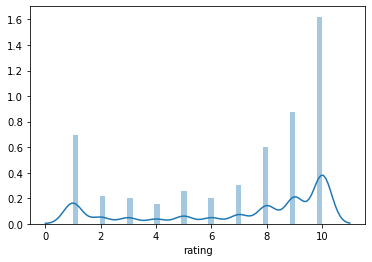

In [36]:
# Effectiveness rating to know how it is distributed
sns.distplot(df_enc_data['rating'])

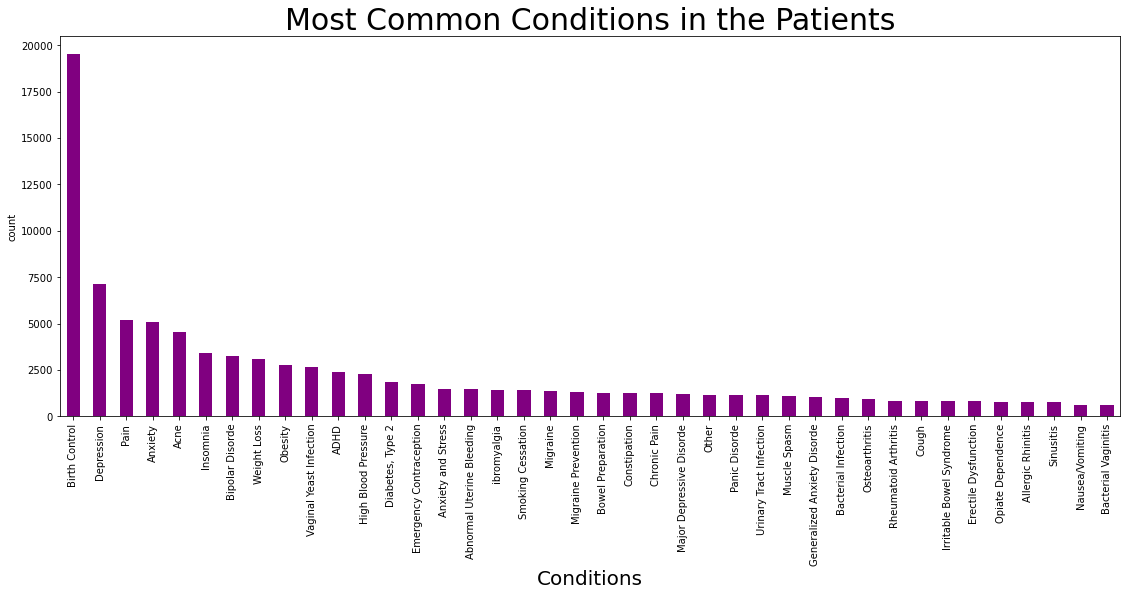

In [37]:
# checking the different types of conditions of patients
df_final_data['condition'].value_counts().head(40).plot.bar(figsize = (19, 7), color = 'purple')
plt.title('Most Common Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

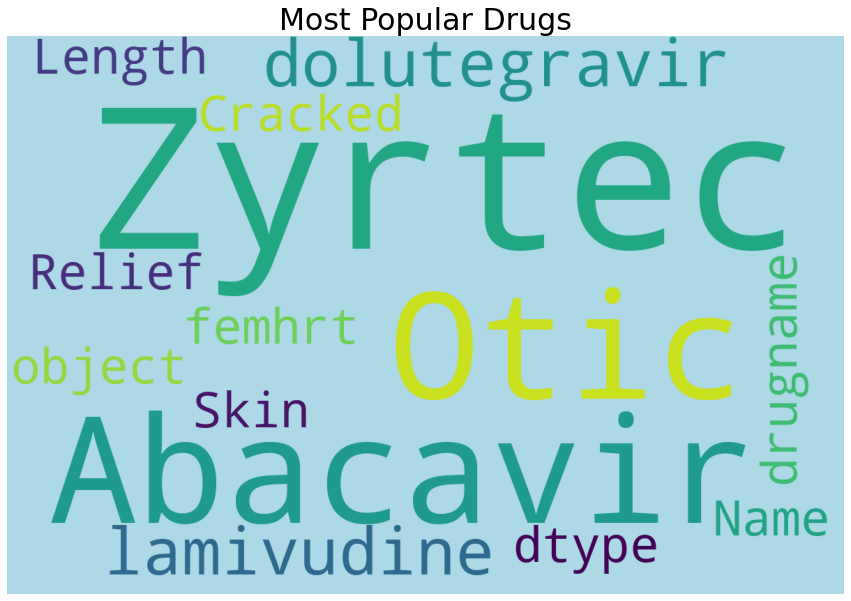

In [38]:
# most popular drugs
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(df_final_data['drugname']))
#wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, max_words = 100, width = 1200, height = 800).generate(str(df_final_data['drugname']))
plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Drugs', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

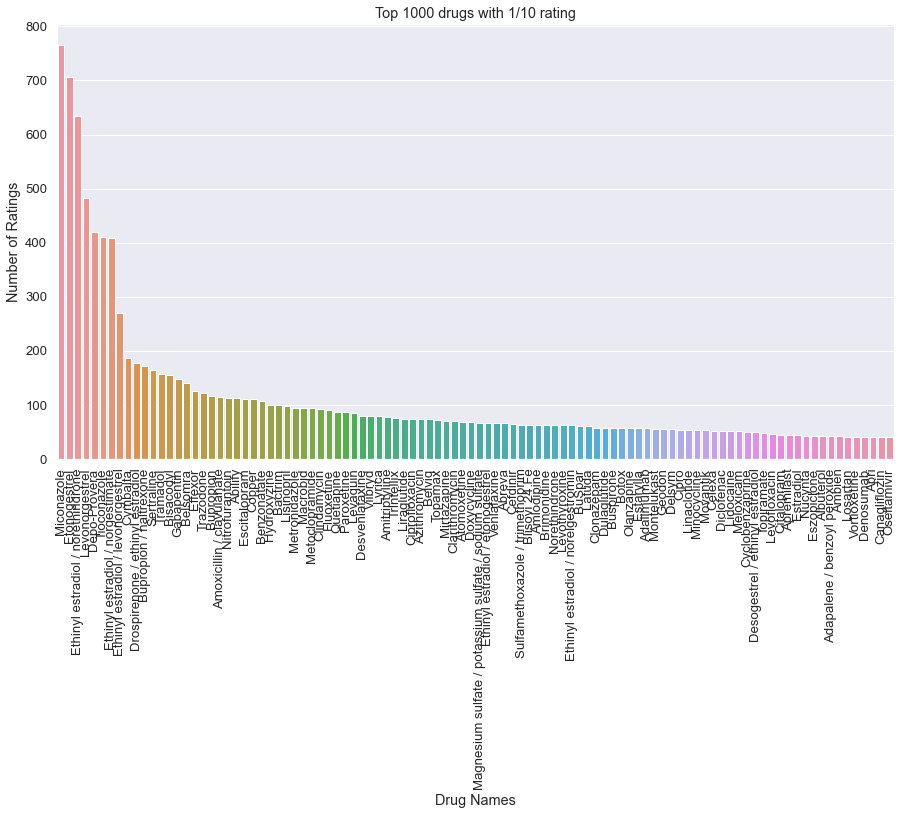

In [39]:
# Barplot is showing top 100 drugs with the 1/10 rating
import seaborn as sns

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_final_data.loc[df_final_data.rating == 1, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:100], y = drug_rating[0:100])

sns_rating.set_title('Top 1000 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

# Feature Engineering 

In [40]:
# New column created for review 

df_final_data.loc[(df_final_data['rating'] >= 5), 'new_review'] = 1
df_final_data.loc[(df_final_data['rating'] < 5), 'new_review'] = 0

df_final_data['new_review'].value_counts()

1.0    97219
0.0    31940
Name: new_review, dtype: int64

In [41]:
df_final_data.head()

,drugname,condition,review,rating,new_review
0,A + D Cracked Skin Relief,Bacterial Skin Infection,"""I have severe cracked skin on my hands. I&#0...",10,1.0
1,A / B Otic,Otitis Media,"""These drops helped me so much. I was in sever...",10,1.0
2,A / B Otic,Otitis Media,"""It numbs the pain. It makes my ear feel heavi...",10,1.0
3,Abacavir / dolutegravir / lamivudine,HIV Infection,"""ok...its been 30 days and all is well....yes,...",9,1.0
4,Abacavir / dolutegravir / lamivudine,HIV Infection,"""I recently found out about my positive status...",7,1.0


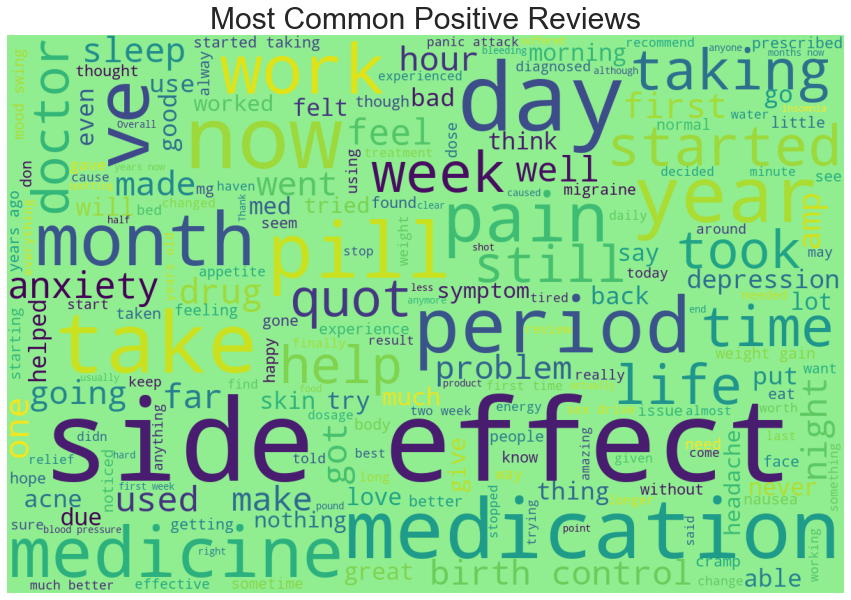

In [42]:
# Postive words for review
positive_words = " ".join([text for text in df_final_data['review'][df_final_data['new_review'] == 1]])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightgreen', stopwords = stopwords, width = 1200, height = 800).generate(positive_words)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

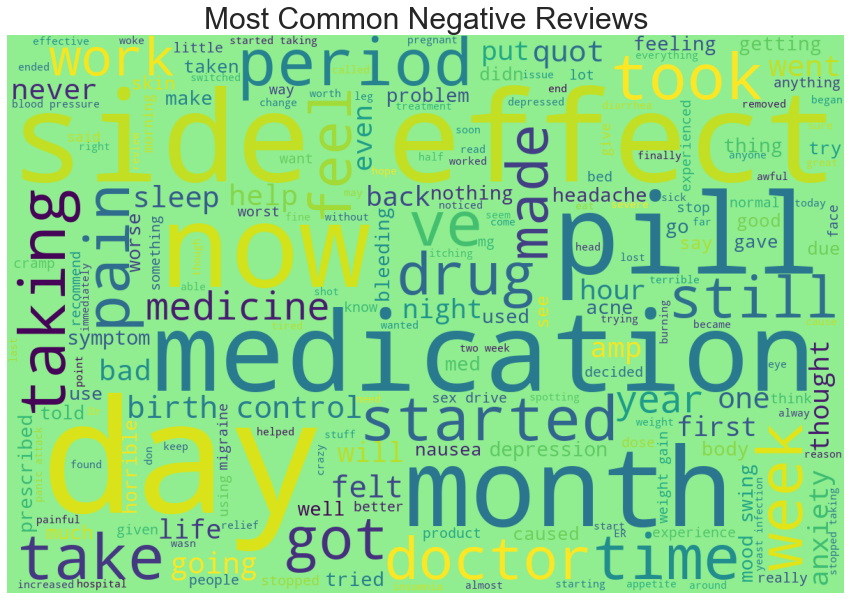

In [43]:
# Negative words for review
negative_words = " ".join([text for text in df_final_data['review'][df_final_data['new_review'] == 0]])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightgreen', stopwords = stopwords, width = 1200, height = 800).generate(negative_words)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [44]:
df_final_data["review"] = df_final_data["review"].str.lower()

In [45]:
df_final_data.head()

,drugname,condition,review,rating,new_review
0,A + D Cracked Skin Relief,Bacterial Skin Infection,"""i have severe cracked skin on my hands. i&#0...",10,1.0
1,A / B Otic,Otitis Media,"""these drops helped me so much. i was in sever...",10,1.0
2,A / B Otic,Otitis Media,"""it numbs the pain. it makes my ear feel heavi...",10,1.0
3,Abacavir / dolutegravir / lamivudine,HIV Infection,"""ok...its been 30 days and all is well....yes,...",9,1.0
4,Abacavir / dolutegravir / lamivudine,HIV Infection,"""i recently found out about my positive status...",7,1.0


In [46]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df_final_data["review"] = df_final_data["review"].apply(lambda text: remove_punctuation(text))

In [47]:
df_final_data

,drugname,condition,review,rating,new_review
0,A + D Cracked Skin Relief,Bacterial Skin Infection,i have severe cracked skin on my hands i039ve...,10,1.0
1,A / B Otic,Otitis Media,these drops helped me so much i was in severe ...,10,1.0
2,A / B Otic,Otitis Media,it numbs the pain it makes my ear feel heavier...,10,1.0
3,Abacavir / dolutegravir / lamivudine,HIV Infection,okits been 30 days and all is wellyes ive had...,9,1.0
4,Abacavir / dolutegravir / lamivudine,HIV Infection,i recently found out about my positive status ...,7,1.0
...,...,...,...,...,...
213665,Zyrtec,Other,very effective in stopping runny nose and snif...,10,1.0
213674,Zyrtec,Other,it was one of my worst days ever with hay feve...,10,1.0
213702,Zyrtec,Other,i take allergy shots for air and mould the sh...,10,1.0
213747,Zyrtec-D,Other,had tried claritind and others prior to findin...,8,1.0


In [48]:
#nltk.download('stopwords')

In [49]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [50]:
df_final_data["review"] = df_final_data["review"].apply(lambda text: remove_stopwords(text))

In [51]:
df_final_data

,drugname,condition,review,rating,new_review
0,A + D Cracked Skin Relief,Bacterial Skin Infection,severe cracked skin hands i039ve tried many di...,10,1.0
1,A / B Otic,Otitis Media,drops helped much severe pain 8 days finally f...,10,1.0
2,A / B Otic,Otitis Media,numbs pain makes ear feel heavier least throbb...,10,1.0
3,Abacavir / dolutegravir / lamivudine,HIV Infection,okits 30 days wellyes ive ups downsanxiety att...,9,1.0
4,Abacavir / dolutegravir / lamivudine,HIV Infection,recently found positive status 82814 prior hiv...,7,1.0
...,...,...,...,...,...
213665,Zyrtec,Other,effective stopping runny nose sniffles would s...,10,1.0
213674,Zyrtec,Other,one worst days ever hay fever ten sodden handk...,10,1.0
213702,Zyrtec,Other,take allergy shots air mould shots marvellous ...,10,1.0
213747,Zyrtec-D,Other,tried claritind others prior finding zyrtecd u...,8,1.0


In [52]:
#Cleaning the review 
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Removing all the non ASCII characters
    ascii_remove = lower.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [53]:
df_final_data['After_clean_review'] = review_clean(df_final_data['review'])

In [54]:
df_final_data.head()

,drugname,condition,review,rating,new_review,After_clean_review
0,A + D Cracked Skin Relief,Bacterial Skin Infection,severe cracked skin hands i039ve tried many di...,10,1.0,severe cracked skin hands i039ve tried many di...
1,A / B Otic,Otitis Media,drops helped much severe pain 8 days finally f...,10,1.0,drops helped much severe pain 8 days finally f...
2,A / B Otic,Otitis Media,numbs pain makes ear feel heavier least throbb...,10,1.0,numbs pain makes ear feel heavier least throbb...
3,Abacavir / dolutegravir / lamivudine,HIV Infection,okits 30 days wellyes ive ups downsanxiety att...,9,1.0,okits 30 days wellyes ive ups downsanxiety att...
4,Abacavir / dolutegravir / lamivudine,HIV Infection,recently found positive status 82814 prior hiv...,7,1.0,recently found positive status 82814 prior hiv...


In [55]:
df_final_data['After_clean_review'][0: 20]

0     severe cracked skin hands i039ve tried many di...
1     drops helped much severe pain 8 days finally f...
2     numbs pain makes ear feel heavier least throbb...
3     okits 30 days wellyes ive ups downsanxiety att...
4     recently found positive status 82814 prior hiv...
5     triumeq 3 months little side effects diagnosed...
6     hiv since nov2002 taking viread triziver docto...
7     handable headaches first disappeared weeks wen...
8     take truimeq 600mg50mg300mg test shows back de...
9     medicine worked well within month taking becam...
10    made first review december 2014 since dataset ...
11    started taking triumeq almost two years diagno...
12    experience phenomenal drug achey times overall...
13    diagnosed 81217 began treatment 925 super pump...
14    taking complera 5 years switched triumec lil m...
15        triumeq working hiv medication gaining weight
16    horrible headaches took week figure appears pe...
17    triumeq since sept 2016 everything fine ti

In [56]:
import re #It is used to helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern.A regular expression is a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern.
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [57]:
#nltk.download('punkt')

In [58]:
ps = PorterStemmer()
wordnet=WordNetLemmatizer()
corpus = []

In [59]:
#nltk.download('wordnet')

In [60]:
for i in range (1,500): #(len(df_final_data["review"])):
    review = re.sub('[^a-zA-Z]', ' ', df_final_data["After_clean_review"][i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer #Transforms text to feature vectors that can be used as input to estimator. vocabulary_ Is a dictionary that converts each token (word) to feature index in the matrix, each unique token gets a feature index.

In [62]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')

In [63]:
tfidf_matrix = tfidf.fit_transform(corpus)

In [64]:
text =df_final_data["After_clean_review"][0]


In [65]:
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [66]:
wordcloud1 = WordCloud().generate(text)

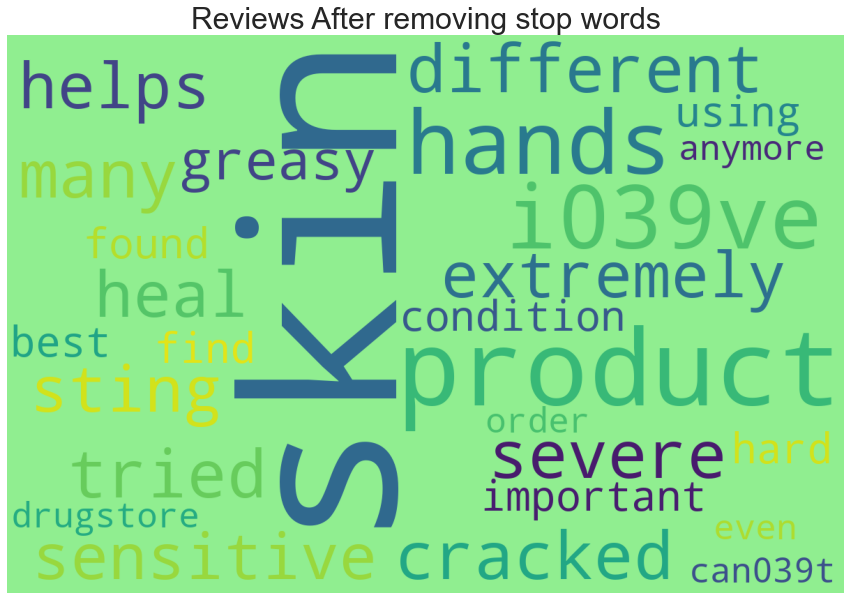

In [67]:
stopwords = set(STOPWORDS)
wordcloud =WordCloud(background_color = 'lightgreen', stopwords = stopwords, width = 1200, height = 800).generate(text)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Reviews After removing stop words', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [68]:
#plt.imshow(wordcloud1, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [69]:
df_final_data['condition'].value_counts().head(20)

Birth Control                19530
Depression                    7114
Pain                          5195
Anxiety                       5097
Acne                          4555
Insomnia                      3421
Bipolar Disorde               3275
Weight Loss                   3112
Obesity                       2757
Vaginal Yeast Infection       2645
ADHD                          2414
High Blood Pressure           2278
Diabetes, Type 2              1854
Emergency Contraception       1724
Anxiety and Stress            1479
Abnormal Uterine Bleeding     1452
ibromyalgia                   1432
Smoking Cessation             1396
Migraine                      1356
Migraine Prevention           1328
Name: condition, dtype: int64

In [70]:
df_final_data.head()

,drugname,condition,review,rating,new_review,After_clean_review
0,A + D Cracked Skin Relief,Bacterial Skin Infection,severe cracked skin hands i039ve tried many di...,10,1.0,severe cracked skin hands i039ve tried many di...
1,A / B Otic,Otitis Media,drops helped much severe pain 8 days finally f...,10,1.0,drops helped much severe pain 8 days finally f...
2,A / B Otic,Otitis Media,numbs pain makes ear feel heavier least throbb...,10,1.0,numbs pain makes ear feel heavier least throbb...
3,Abacavir / dolutegravir / lamivudine,HIV Infection,okits 30 days wellyes ive ups downsanxiety att...,9,1.0,okits 30 days wellyes ive ups downsanxiety att...
4,Abacavir / dolutegravir / lamivudine,HIV Infection,recently found positive status 82814 prior hiv...,7,1.0,recently found positive status 82814 prior hiv...


In [71]:
df_final_data.count()

drugname              129159
condition             129159
review                129159
rating                129159
new_review            129159
After_clean_review    129159
dtype: int64

In [72]:
df_final_data

,drugname,condition,review,rating,new_review,After_clean_review
0,A + D Cracked Skin Relief,Bacterial Skin Infection,severe cracked skin hands i039ve tried many di...,10,1.0,severe cracked skin hands i039ve tried many di...
1,A / B Otic,Otitis Media,drops helped much severe pain 8 days finally f...,10,1.0,drops helped much severe pain 8 days finally f...
2,A / B Otic,Otitis Media,numbs pain makes ear feel heavier least throbb...,10,1.0,numbs pain makes ear feel heavier least throbb...
3,Abacavir / dolutegravir / lamivudine,HIV Infection,okits 30 days wellyes ive ups downsanxiety att...,9,1.0,okits 30 days wellyes ive ups downsanxiety att...
4,Abacavir / dolutegravir / lamivudine,HIV Infection,recently found positive status 82814 prior hiv...,7,1.0,recently found positive status 82814 prior hiv...
...,...,...,...,...,...,...
213665,Zyrtec,Other,effective stopping runny nose sniffles would s...,10,1.0,effective stopping runny nose sniffles would s...
213674,Zyrtec,Other,one worst days ever hay fever ten sodden handk...,10,1.0,one worst days ever hay fever ten sodden handk...
213702,Zyrtec,Other,take allergy shots air mould shots marvellous ...,10,1.0,take allergy shots air mould shots marvellous ...
213747,Zyrtec-D,Other,tried claritind others prior finding zyrtecd u...,8,1.0,tried claritind others prior finding zyrtecd u...
